自然言語処理（NLP, Natural Language Processing） とは人間が普段使っている 自然言語 をコンピュータに処理させる技術のことです。ここではその中でも、機械学習の入力として自然言語を用いることを考えていきます。


多くの機械学習手法は 数値データ（量的変数） の入力を前提にしていますので、自然言語の テキストデータ を数値データに変換する必要があります。これを 自然言語のベクトル化 と呼びます。ベクトル化の際にテキストデータの特徴をうまく捉えられるよう、様々な手法が考えられてきていますので、このSprintではそれらを学びます。


非構造化データ
データの分類として、表に数値がまとめられたようなコンピュータが扱いやすい形を 構造化データ 、人間が扱いやすい画像・動画・テキスト・音声などを 非構造化データ と呼ぶことがあります。自然言語のベクトル化は、非構造化データを構造化データに変換する工程と言えます。同じ非構造化データでも、画像に対してはディープラーニングを用いる場合この変換作業はあまり必要がありませんでしたが、テキストにおいてはこれをどう行うかが重要です。


自然言語処理により何ができるか
機械学習の入力や出力に自然言語のテキストを用いることで様々なことができます。入力も出力もテキストである例としては 機械翻訳 があげられ、実用化されています。入力は画像で出力がテキストである 画像キャプション生成 やその逆の文章からの画像生成も研究が進んでいます。


しかし、出力をテキストや画像のような非構造化データとすることは難易度が高いです。比較的簡単にできることとしては、入力をテキスト、出力をカテゴリーとする テキスト分類 です。


アヤメやタイタニック、手書き数字のような定番の存在として、IMDB映画レビューデータセット の感情分析があります。レビューの文書が映画に対して肯定的か否定的かを2値分類します。文書ごとの肯定・否定はラベルが与えられています。このSprintではこれを使っていきます。

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [10]:
#IMDB映画レビューデータセットを準備します。
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    
# 解凍
!tar zxf aclImdb_v1.tar.gz

--2020-04-21 16:39:19--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
ai.stanford.edu (ai.stanford.edu) をDNSに問いあわせています... 171.64.68.10
ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84125825 (80M) [application/x-gzip]
`aclImdb_v1.tar.gz.1' に保存中

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  4.63MB/s 時間 18s        

2020-04-21 16:39:37 (4.58 MB/s) - `aclImdb_v1.tar.gz.1' へ保存完了 [84125825/84125825]



In [11]:
ls

 Sprint_24/
20191022VCS_Github_DIC.pdf
20200123_EDA_example.ipynb
Breast.ipynb
CNN.ipynb
CNN2.ipynb
Classifier Flow(Home Credit)_2.ipynb
Comprehensive data exploration with Python | Kaggle.pdf
DICスライド/
DeepNN.ipynb
GAN.ipynb
Githubフローハンズオン.pdf
Home Credit Default Risk Extensive EDA | Kaggle.webloc
HomeCredit_columns_description.csv*
Install.ipynb
Iris.csv
Keras.ipynb
MNIST.ipynb
Mr.Shibata_sprint2.ipynb
NN.ipynb
Pandas Graph.ipynb
Python for DATA ANALYSIS.ipynb
README.md
SVM.ipynb
SVM基本.ipynb
Scratch1_HomeCredit.ipynb
Sprint0_scratch.ipynb
Sprint10_CNN.ipynb
Sprint11_CNN2.ipynb
Sprint12_tensorflow.ipynb
Sprint13_Keras.ipynb
Sprint13_Tensorflow入門 (1).ipynb
Sprint14_Reading.ipynb
Sprint16_colab版の準備（受講生用） (1).ipynb
Sprint17_make_dataset.ipynb
Sprint18 segmentation.ipynb
Sprint18_colab版の準備（受講生用）_ipynb_のコピー.ipynb
Sprint18_セグメンテーション1.pdf
Sprint19/
Sprint19.ipynb
Sprint1_ML_Flow.ipynb
Sprint20_NLP.ipynb
Sprint22 RNN.ipynb
Sprint22_gateRNN.ipynb
Sprint23_seq2seq.ipynb
Sprint2_linear_regressio

In [15]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train , y_train = train_review.data , train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test , y_test = test_review.data , test_review.target

#ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [13]:
#train_review.data

In [14]:
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup

In [ ]:
#train_review
#

このデータセットについて
中身を見てみると、英語の文章が入っていることが分かります
4点以下を否定的、7点以下を肯定的なレビューとして2値のラベル付けしており、これにより感情の分類を行います。5,6点の中立的なレビューはデータセットに含んでいません。また、ラベルは訓練用・テスト用それぞれで均一に入っています。詳細はダウンロードしたREADMEを確認してください

In [16]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


単純ながら効果的な方法として BoW (Bag of Words) があります。これは、サンプルごとに単語などの 登場回数 を数えたものをベクトルとする方法です。単語をカテゴリとして捉え one-hot表現 していることになります。

In [17]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer?単語の出現頻度を数える
#BoWは厳密には単語を数えているのではなく、 トークン（token） として定めた固まりを数えます
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')

bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


形態素解析
英語などの多くの言語では空白という分かりやすい基準でトークン化が行えますが、日本語ではそれが行えません。


日本語では名詞や助詞、動詞のように異なる 品詞 で分けられる単位で 分かち書き することになります。例えば「私はプログラミングを学びます」という日本語の文は「私/は/プログラミング/を/学び/ます」という風になります。


これには MeCab や Janome のような形態素解析ツールを用います。Pythonから利用することも可能です。MeCabをウェブ上で簡単に利用できる
Web茶まめ
というサービスも国立国語研究所が提供しています。


自然言語では新しい言葉も日々生まれますので、それにどれだけ対応できるかも大切です。MeCab用の毎週更新される辞書として mecab-ipadic-NEologd がオープンソースで存在しています。

https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md


n-gram
上のBoWの例では1つの単語（トークン）毎の登場回数を数えましたが、これでは語順は全く考慮されていません。


考慮するために、隣あう単語同士をまとめて扱う n-gram という考え方を適用することがあります。2つの単語をまとめる場合は 2-gram (bigram) と呼び、次のようになります。

In [19]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


【問題1】BoWのスクラッチ実装   
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。   
This movie is SOOOO funny!!!  
What a movie! I never  
best movie ever!!!!! this movie

カラムの作成
①クリーニング(正規表現、文字であるものを抽出する)、大文字小文字 
②分割:split(" ")
③pd.DataFrame

カラム名と文章の比較
①出現回数のカウント
②カラムと切り出された文字列の照合:切り出す
③一致したらカラムに足す
forとif
④

In [20]:
test_dataset= \
["This movie is SOOOO funny!!! " ,
"What a movie! I never",
"best movie ever!!!!! this movie"]

print(test_dataset)

['This movie is SOOOO funny!!! ', 'What a movie! I never', 'best movie ever!!!!! this movie']


In [32]:
#http://robonchu.hatenablog.com/entry/2017/11/20/183403
mini_dataset = ["This movie is SOOOO funny!!!",
                        "What a movie! I never" , 
                        "best movie ever!!!!! this movie"]

def scratch_BOW(dataset , n=1):
    df = pd.DataFrame(index=range(len(dataset)))
    for i , data in enumerate(dataset):
        word_list0 = make_word_list(data)
        word_list = [" ".join(word_list0[i : i+n])for i in range(len(word_list0) - (n-1))]
        for word in word_list:
            if word not in df.columns:
                df[word] = 0
            df.loc[i , word] += 1
    df_s = df.sort_index(axis=1)
    return df_s

def make_word_list(sentence):
    sentence = sentence.replace(",", "").replace(".", "").replace("!", "").replace('"', '').replace("<br />", "").replace("/", " and ").lower()
    return sentence.split(" ")

In [33]:
df = scratch_BOW(mini_dataset)
df


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


In [34]:
df_2 = scratch_BOW(mini_dataset , n=2)
df_2

,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


In [35]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = np.array(["This movie is SOOOO funny !!!",
                        "What a movie ! I never" , 
                        "best movie ever !!!!! this movie"])
bag = count.fit_transform(docs)

print(count.vocabulary_)

{'this': 7, 'movie': 4, 'is': 3, 'soooo': 6, 'funny': 2, 'what': 8, 'never': 5, 'best': 0, 'ever': 1}


In [36]:
print(bag.toarray())

[[0 0 1 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 0 1]
 [1 1 0 0 2 0 0 1 0]]


6.TF-IDF
BoWの発展的手法として TF-IDF もよく使われます。これは Term Frequency (TF) と Inverse Document Frequency (IDF) という2つの指標の組み合わせです。

IDFはそのトークンがデータセット内で珍しいほど値が大きくなる指標です。

サンプル数 N をIMDB映画レビューデータセットの訓練用データに合わせ25000として、トークンが出現するサンプル数 d f ( t ) を変化させたグラフを確認してみると、次のようになります。

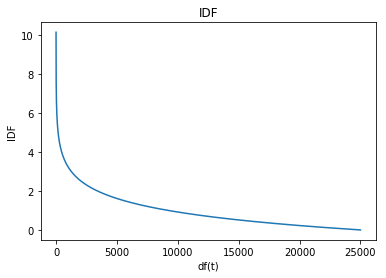

In [39]:
n_samples = 25000
idf = np.log(n_samples / np.arange(1 , n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

ストップワード
あまりにも頻繁に登場するトークンは、値を小さくするだけでなく、取り除くという前処理を加えることもあります。取り除くもののことを ストップワード と呼びます。既存のストップワード一覧を利用したり、しきい値によって求めたりします。

scikit-learnのCountVectorizerでは引数stop_wordsにリストで指定することで処理を行なってくれます。

In [40]:
vectorizer = CountVectorizer(stop_words = ["is"] , token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train , columns=vectorizer.get_feature_names())
display(df)

,a,best,ever,funny,i,movie,never,soooo,this,what
0,0,0,0,1,0,1,0,1,1,0
1,1,0,0,0,1,1,1,0,0,1
2,0,1,1,0,0,2,0,0,1,0


代表的な既存のストップワード一覧としては、NLTK という自然言語処理のライブラリのものがあげられます。あるデータセットにおいては特別重要な意味を持つ単語が一覧に含まれている可能性もあるため、使用する際は中身を確認することが望ましいです。

In [41]:
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how'

逆に、登場回数が特に少ないトークンも取り除くことが多いです。全てのトークンを用いるとベクトルの次元数が著しく大きくなってしまい計算コストが高まるためです。

scikit-learnのCountVectorizerでは引数max_featuresに最大の語彙数を指定することで処理を行なってくれます。以下の例では出現数が多い順に5個でベクトル化しています。

In [42]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b' , max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train , columns=vectorizer.get_feature_names())
display(df)

,a,best,ever,movie,this
0,0,0,0,1,1
1,1,0,0,1,0
2,0,1,1,2,1


【問題2】TF-IDFの計算  
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。


sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation

sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation


なお、scikit-learnでは標準的な式とは異なる式が採用されています。


また、デフォルトではnorm="l2"の引数が設定されており、各サンプルにL2正規化が行われます。norm=Noneとすることで正規化は行われなくなります。

In [27]:
from sklearn.datasets import load_files
#
train_review = load_files('./aclImdb/train/', encoding='utf-8')
#dataを抽出してx_trainに格納、targetを抽出してy_trainに格納
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [28]:
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b', max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = stopwords.words("english")

vectorizer = TfidfVectorizer(stop_words = 
                             stop_words ,ngram_range=(1,1), token_pattern=r'\b\w+\b' , max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train[0:1])).toarray()
df = pd.DataFrame(bow_train , columns=vectorizer.get_feature_names())
display(df.head())

,actions,actors,almost,anything,better,beyond,bizarre,boys,br,captures,...,terrible,think,time,two,via,withdraw,world,would,young,zero
0,0.094916,0.094916,0.094916,0.094916,0.189832,0.094916,0.094916,0.094916,0.379663,0.094916,...,0.094916,0.189832,0.094916,0.284747,0.189832,0.094916,0.094916,0.094916,0.189832,0.094916


In [44]:
df.describe()

,actions,actors,almost,anything,better,beyond,bizarre,boys,br,captures,...,terrible,think,time,two,via,withdraw,world,would,young,zero
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.094916,0.094916,0.094916,0.094916,0.189832,0.094916,0.094916,0.094916,0.379663,0.094916,...,0.094916,0.189832,0.094916,0.284747,0.189832,0.094916,0.094916,0.094916,0.189832,0.094916
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.094916,0.094916,0.094916,0.094916,0.189832,0.094916,0.094916,0.094916,0.379663,0.094916,...,0.094916,0.189832,0.094916,0.284747,0.189832,0.094916,0.094916,0.094916,0.189832,0.094916
25%,0.094916,0.094916,0.094916,0.094916,0.189832,0.094916,0.094916,0.094916,0.379663,0.094916,...,0.094916,0.189832,0.094916,0.284747,0.189832,0.094916,0.094916,0.094916,0.189832,0.094916
50%,0.094916,0.094916,0.094916,0.094916,0.189832,0.094916,0.094916,0.094916,0.379663,0.094916,...,0.094916,0.189832,0.094916,0.284747,0.189832,0.094916,0.094916,0.094916,0.189832,0.094916
75%,0.094916,0.094916,0.094916,0.094916,0.189832,0.094916,0.094916,0.094916,0.379663,0.094916,...,0.094916,0.189832,0.094916,0.284747,0.189832,0.094916,0.094916,0.094916,0.189832,0.094916
max,0.094916,0.094916,0.094916,0.094916,0.189832,0.094916,0.094916,0.094916,0.379663,0.094916,...,0.094916,0.189832,0.094916,0.284747,0.189832,0.094916,0.094916,0.094916,0.189832,0.094916


In [45]:
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=
                            stop_words, ngram_range=(1, 1), token_pattern=r'\b\w+\b', max_features = 5000)
#ベクトル化
bow_train = vectorizer.fit_transform(x_train[0:1]).toarray()
print(bow_train)

[[0.0949158 0.0949158 0.0949158 0.0949158 0.1898316 0.0949158 0.0949158
  0.0949158 0.3796632 0.0949158 0.0949158 0.0949158 0.0949158 0.0949158
  0.0949158 0.0949158 0.0949158 0.0949158 0.0949158 0.0949158 0.0949158
  0.0949158 0.1898316 0.1898316 0.0949158 0.0949158 0.0949158 0.0949158
  0.0949158 0.0949158 0.0949158 0.0949158 0.0949158 0.0949158 0.0949158
  0.0949158 0.0949158 0.0949158 0.0949158 0.0949158 0.1898316 0.0949158
  0.0949158 0.0949158 0.0949158 0.0949158 0.0949158 0.0949158 0.0949158
  0.1898316 0.1898316 0.0949158 0.1898316 0.0949158 0.2847474 0.1898316
  0.0949158 0.0949158 0.0949158 0.1898316 0.0949158]]


In [50]:
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=
                            stop_words, ngram_range=(1, 1), token_pattern=r'\b\w+\b', max_features = 5000)
#ベクトル化
bow_train = vectorizer.fit_transform(x_train).toarray()
print(bow_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=
                            stop_words, ngram_range=(1, 1), token_pattern=r'\b\w+\b', max_features = 5000)
#ベクトル化
bow_test = vectorizer.fit_transform(x_test).toarray()
print(bow_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


【問題3】TF-IDFを用いた学習

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(bow_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_pred = lr.predict(bow_test)

In [54]:
lr.score(bow_train , y_train)

0.91908

In [55]:
lr.score(bow_test , y_test)

0.53536

【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

In [56]:
import re

class TF_IDF():
    
    def __init__(self , corpus):
        self.corpus = corpus
        
    def tf(self):
        l = []
        c = []
        
        #corpusの各テキストを単語毎に分割
        for text in self.corpus:
            c += re.findall(r'\b\w+\b' , text)
        
        #抽出した単語の重複を削除
        c = list(set(c))
        
        #各テキスト毎の単語出現回数をカウントし、該当テキストの総単語数で割る
        for text in self.corpus:
            x = re.findall(r'\b\w+\b' , text)
            l.append([x.count(i) / len(x) for i in c])
        return np.array(l)
    
    def idf(self):
        terms = []
        
        for text in self.corpus:
            terms += re.findall(r'\b\w+\b' , text)
            
        terms = list(set(terms))
        
        l = []
        
        for term in terms:
            c = 0
        
            for text in self.corpus:
                word_list = re.findall(r'\b\w+\b' , text)
                #該当テキスト内に含まれている単語であれば、１カウントする
                #重複カウントを防ぐために論理演算子は『in』を用いる
                #文章の繋がりで、単語ではないものを単語としてカウントしないように上記でリスト化している
                if term in word_list:
                    c += 1
            
            l.append(np.log(len(self.corpus) / c ))
            
        return np.array(l)
    
    def l2(self , x):
        #l2ノルムで正規化する（単位ベクトル化）
        l2 = x / np.sqrt(np.sum(x**2))
        
        return l2
    
    def tf_idf(self):
        x = self.tf() * self.idf()
        #各行にl2ノルムの正規化を適用
        return np.array([self.l2(a) for a in x])

In [57]:
mini_data = ["This movie is SOOOO funny!!!",
                    "What a movie! I never",
                    "best movie ever!!!!! this movie"]

In [58]:
tf = TF_IDF(mini_data)
tf_idf = tf.tf_idf()

In [59]:
print(np.sum(tf_idf[0]))
print(np.sum(tf_idf[1]))
print(np.sum(tf_idf[2]))

2.0
2.0
1.7320508075688772


In [60]:
stop_words = stopwords.words("english")

vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_data)).toarray()
df = pd.DataFrame(bow_train , columns=vectorizer.get_feature_names())
print(np.sum(bow_train[0]))
print(np.sum(bow_train[1]))
print(np.sum(bow_train[2]))

2.1956355375164818
2.201328677102573
1.977388147087266


scikit-learn

In [61]:
import re

class TF_IDF2():
    
    def __init__(self , corpus):
        self.corpus = corpus
        
    def tf(self):
        l = []
        c = []
        
        #corpusの各テキストを単語毎に分割
        for text in self.corpus:
            c += re.findall(r'\b\w+\b' , text)
        
        #抽出した単語の重複を削除
        c = list(set(c))
        
        #各テキスト毎の単語出現回数をカウントし、該当テキストの総単語数で割る
        for text in self.corpus:
            x = re.findall(r'\b\w+\b' , text)
            l.append([x.count(i) / len(x) for i in c])
        return np.array(l)
    
    def idf(self):
        terms = []
        
        for text in self.corpus:
            terms += re.findall(r'\b\w+\b' , text)
            
        terms = list(set(terms))
        
        l = []
        
        for term in terms:
            c = 0
        
            for text in self.corpus:
                word_list = re.findall(r'\b\w+\b' , text)
                #該当テキスト内に含まれている単語であれば、１カウントする
                #重複カウントを防ぐために論理演算子は『in』を用いる
                #文章の繋がりで、単語ではないものを単語としてカウントしないように上記でリスト化している
                if term in word_list:
                    c += 1
            
            #各単語IDFを計算。sklearnの計算と合わせるため、分母分子に１を足す
            #更にその計算結果にも１を足す
            l.append(np.log((1 + len(self.corpus)) / (c + 1)) + 1)
            
        return np.array(l)
    
    def l2(self , x):
        #l2ノルムで正規化する（単位ベクトル化）
        l2 = x / np.sqrt(np.sum(x**2))
        
        return l2
    
    def tf_idf(self):
        x = self.tf() * self.idf()
        #各行にl2ノルムの正規化を適用
        return np.array([self.l2(a) for a in x])

In [62]:
tf = TF_IDF2(mini_data)
tf_idf = tf.tf_idf()

In [63]:
print(np.sum(tf_idf[0]))
print(np.sum(tf_idf[1]))
print(np.sum(tf_idf[2]))

2.201328677102573
2.201328677102573
1.994387551089178


In [64]:
stop_words = stopwords.words("english")

vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_data)).toarray()
df = pd.DataFrame(bow_train , columns=vectorizer.get_feature_names())
print(np.sum(bow_train[0]))
print(np.sum(bow_train[1]))
print(np.sum(bow_train[2]))

2.1956355375164818
2.201328677102573
1.977388147087266


ニューラルネットワークを用いてベクトル化を行う手法が Word2Vec です。


BoWやTF-IDFはone-hot表現であったため、得られるベクトルの次元は語彙数分になります。そのため、語彙数を増やしにくいという問題があります。一方で、Word2Vecでは単語を任意の次元のベクトルに変換します。これをを Word Embedding（単語埋め込み） や 分散表現 と呼びます。変換操作を「ベクトル空間に埋め込む」と言うことが多いです。


Word2VecにはCBoWとSkip-gramという2種類の仕組みがあるため順番に見ていきます。


CBoW
CBoW (Continuous Bag-of-Words) によるWord2Vecではある単語とある単語の間に来る単語を推定できるように全結合層2層のニューラルネットワークを学習します。


単語はコーパスの語彙数次元のone-hot表現を行なっておきます。そのため、入力と出力の次元は語彙数と同じになります。一方で、中間のノード数をWord2Vecにより得たい任意の次元数とします。これにより全結合層の重みは「得たい次元のノード数×語彙数」になります。このネットワークにより学習を行なった後、出力側の重みを取り出すことで、各語彙を表すベクトルを手に入れることができます。


間の単語の推定を行なっているため、同じ箇所で代替可能な言葉は似たベクトルになるというメリットもあります。これはBoWやTF-IDFでは得られない情報です。


あるテキストは「そのテキストの長さ（単語数）×Word2Vecで得た分散表現の次元数」の配列になりますが、各入力の配列を揃える必要があるモデルに入力するためには、短いテキストは空白を表す単語を加える パディング を行なったり、長いテキストは単語を消したりします。テキストを 固定長 にすると呼びます。


ウィンドウサイズ
入力する単語は推定する前後1つずつだけでなく、複数個とする場合もあります。前後いくつを見るかの大きさを ウィンドウサイズ と呼びます。


Skip-gram
CBoWとは逆にある単語の前後の単語を推定できるように全結合層2層のニューラルネットワークを学習する方法が Skip-gram です。学習を行なった後は入力側の重みを取り出し各語彙を表すベクトルとします。現在一般的に使われているのはCBoWよりもSki-gramです。


利用方法
Pythonでは Gensim ライブラリを用いて扱うことができます。


gensim: models.word2vec – Word2vec embeddings


BoWの例と同じ文章で学習してみます。CountVectorizerと異なり前処理を自動的に行なってはくれないため、単語（トークン）はリストで分割しておきます。また、大文字は小文字に揃え、記号は取り除きます。


デフォルトのパラメータではCBoWで計算されます。また、ウィンドウサイズはwindow=5に設定されています。

In [65]:
!pip install --upgrade gensim

     |████████████████████████████████| 23.7 MB 30.4 MB/s eta 0:00:01   |████████▉                       | 6.5 MB 1.1 MB/s eta 0:00:16     |█████████████████▍              | 12.9 MB 1.3 MB/s eta 0:00:09     |██████████████████████▌         | 16.6 MB 769 kB/s eta 0:00:10
     |████████████████████████████████| 105 kB 505 kB/s eta 0:00:01
     |████████████████████████████████| 128 kB 409 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 557 kB/s eta 0:00:01
     |████████████████████████████████| 6.1 MB 817 kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.11.1-py3-none-any.whl size=95255 sha256=668f1dde2091c36b6edd6057f8d201cac0b8acb83d8fa6b8bff4f398abb5e568
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/89/6b/f0/391fb74c038a4b87d4ac6ef4cd4c96ea820ec39b60f78d03a1
Successfully built smart-open


In [66]:
from gensim.models import Word2Vec

unable to import 'smart_open.gcs', disabling that module


In [67]:
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count = 1 , size = 10)#次元数を10に設定
model.build_vocab(sentences)#準備
model.train(sentences , total_examples = model.corpus_count , epochs = model.iter)#学習

print("語彙の一覧 : {}".format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
    print("{}のベクトル : \n{}".format(vocab , model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.03884272 -0.03484932 -0.03924293 -0.00516608  0.01237799  0.01782521
  0.03781011 -0.01596084  0.01485014  0.02464964]
movieのベクトル : 
[-0.04081175  0.01767913 -0.04324322  0.03334064 -0.00117866 -0.04398617
 -0.02996933  0.04711305 -0.00497666  0.00169678]
isのベクトル : 
[ 0.02455612  0.03430059  0.02413583 -0.03429679 -0.04066877 -0.0204979
 -0.04698607  0.04883166 -0.03391479 -0.02782011]
veryのベクトル : 
[-0.04612647 -0.02168088  0.04908155  0.02963647  0.03245099 -0.04209697
 -0.02872722  0.0300161  -0.0227239  -0.01966136]
goodのベクトル : 
[ 0.01863581 -0.04840856 -0.00535998  0.00723026 -0.01236279 -0.03315582
  0.03674081  0.00950481 -0.00368871  0.01753785]
filmのベクトル : 
[ 0.00117126  0.03006574 -0.04418568  0.04894169 -0.01926022  0.00830618
 -0.03598302  0.01012192 -0.04316878 -0.00191328]
aのベクトル : 
[ 0.02629136  0.01677017  0.04813191 -0.02960331 -0.04839702 -0.02744369
  0.01683551  0.04388301

/Users/apple/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
/Users/apple/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  after removing the cwd from sys.path.


単語の距離
ベクトル間で計算を行うことで、ある単語に似たベクトルを持つ単語を見つけることができます。 例えばgoodに似たベクトルの単語を３つ探します

In [68]:
model.wv.most_similar(positive="good" , topn=3)

[('this', 0.5325943231582642),
 ('a', 0.30311304330825806),
 ('very', 0.012908760458230972)]

可視化¶
2次元に圧縮することで単語ごとの位置関係を可視化することができます。以下はt-SNEを用いた例です。

/Users/apple/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


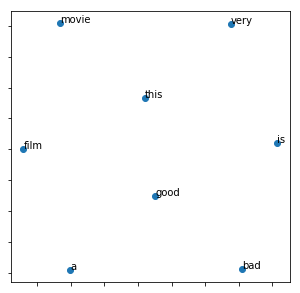

In [69]:
from sklearn.manifold import TSNE

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40 , n_components=2 , init="pca" , n_iter=500 , random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig , ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[: , 0] , vectors_tsne[: , 1])
for i , word in enumerate(list(vocabs)):
    plt.annotate(word , xy=(vectors_tsne[i , 0] , vectors_tsne[i , 1]))

ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

【問題5】コーパスの前処理¶
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。
https://datumstudio.jp/blog/python%E3%81%AB%E3%82%88%E3%82%8B%E6%97%A5%E6%9C%AC%E8%AA%9E%E5%89%8D%E5%87%A6%E7%90%86%E5%82%99%E5%BF%98%E9%8C%B2

https://qiita.com/kenTee/items/dcf63aa2895122bb3fd1

In [70]:
words = ["This movie is SOOOO funny!!!",
                        "What a movie! I never" , 
                        "best movie ever!!!!! this movie"]

In [71]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train , y_train = train_review.data , train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test , y_test = test_review.data , test_review.target

#ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [72]:
def corpus(x):
    for i in range(len(x)):
        x[i] = x[i].lower()#大文字を小文字へ
        x[i] = x[i].replace("!" , "").strip()#[!]を削除
        x[i] = x[i].replace("?" , "").strip()#[?]を削除
        x[i] = x[i].replace("<br />" , "").strip()
        x[i] = re.sub(r"https?://[\w/:%#\$&\?\(\)~\.=\+\-]+", "", x[i])
        x[i] = x[i].split()
    return x

In [73]:
x = corpus(words)

In [74]:
x

[['this', 'movie', 'is', 'soooo', 'funny'],
 ['what', 'a', 'movie', 'i', 'never'],
 ['best', 'movie', 'ever', 'this', 'movie']]

In [75]:
xt = corpus(x_train)

In [78]:
xt[:5]

[['zero',
  'day',
  'leads',
  'you',
  'to',
  'think,',
  'even',
  're-think',
  'why',
  'two',
  'boys/young',
  'men',
  'would',
  'do',
  'what',
  'they',
  'did',
  '-',
  'commit',
  'mutual',
  'suicide',
  'via',
  'slaughtering',
  'their',
  'classmates.',
  'it',
  'captures',
  'what',
  'must',
  'be',
  'beyond',
  'a',
  'bizarre',
  'mode',
  'of',
  'being',
  'for',
  'two',
  'humans',
  'who',
  'have',
  'decided',
  'to',
  'withdraw',
  'from',
  'common',
  'civility',
  'in',
  'order',
  'to',
  'define',
  'their',
  'own/mutual',
  'world',
  'via',
  'coupled',
  'destruction.it',
  'is',
  'not',
  'a',
  'perfect',
  'movie',
  'but',
  'given',
  'what',
  'money/time',
  'the',
  'filmmaker',
  'and',
  'actors',
  'had',
  '-',
  'it',
  'is',
  'a',
  'remarkable',
  'product.',
  'in',
  'terms',
  'of',
  'explaining',
  'the',
  'motives',
  'and',
  'actions',
  'of',
  'the',
  'two',
  'young',
  'suicide/murderers',
  'it',
  'is',
  'bet

【問題6】Word2Vecの学習
Word2Vecの学習を行なってください

In [ ]:
from gensim.models import Word2Vec

sentences = xt
model =Word2Vec(min_count = 1, size = 10)
model.build_vocab(sentences)
model.train(sentences, total_examples= model.corpus_count, epochs= model.iter)

/Users/apple/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
/Users/apple/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  
